In [3]:
import numpy as np
import matplotlib.pyplot as plt
from highway_env.road.lane import StraightLane
from highway_env.road.road import Road, RoadNetwork
from highway_env.vehicle.controller import ControlledVehicle

In [5]:
road = Road(RoadNetwork.straight_road_network(1))
v = ControlledVehicle(road=road, position=road.network.get_lane(("0", "1", 0)).position(0, 0), speed=0, heading=0)

FPS = 15
t = 2 * 20
ran_t = range(t)

posx = np.zeros(t, dtype = int)
posy = np.zeros(t, dtype = int)
acc = np.zeros(t, dtype = int)
target_vel = np.zeros(t, dtype = int)
vel = np.zeros(t, dtype = int)
heading = np.zeros(t, dtype = int)


for i in range(t):
  
  if i  < 3: #or i == 25:
    v.act('FASTER')

  if i == 5:
    v.act({ 'steering': 0.5})

  v.act()
  v.step(dt=1/FPS)

  vel[i] = v.speed
  target_vel[i] = v.target_speed
  acc[i] = v.speed_control(v.target_speed)
  posx[i] = v.position[0]
  posy[i] = v.position[1]

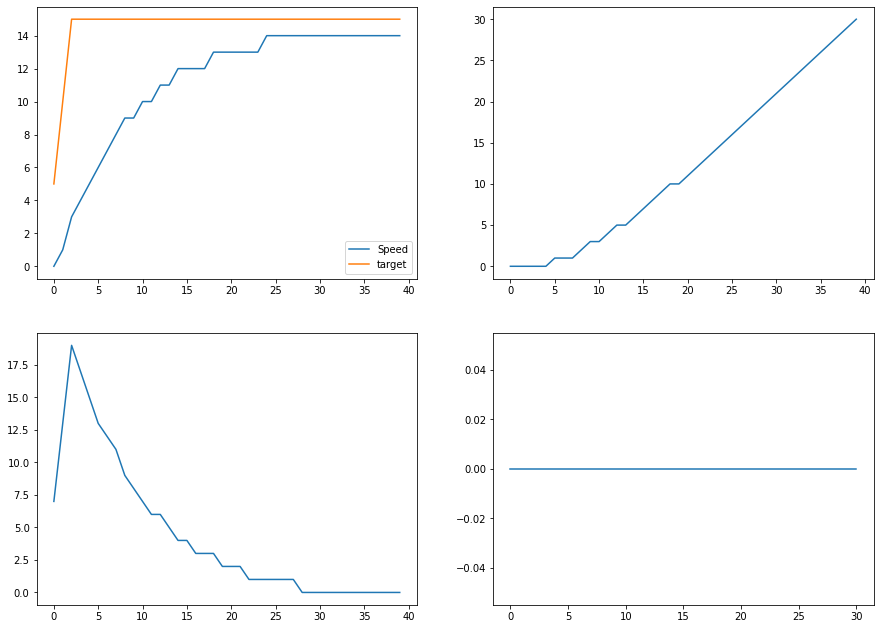

In [6]:
fig = plt.figure(figsize=(15, 11))
plt.subplot(2, 2, 1)
plt.plot(ran_t,vel,label = "Speed")
plt.plot(ran_t, target_vel, label = "target")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(ran_t,posx)

plt.subplot(2, 2, 3)
plt.plot(ran_t,acc)

plt.subplot(2, 2, 4)
plt.plot(posx,posy)

plt.show()